# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

En el presente documento se analizará cómo las variables ya mencionadas inciden en el incumplimiento de pago del préstamo.

# Contents <a id='back'></a>

* [Etapa 1. Importacion de data](#intro)
* [Etapa 2. Exploración de data](#data_exp)
* [Etapa 3. Transformación de datos](#data_trans)
* [Etapa 4. Clasificación de datos](#data_class)
* [Etapa 5. Comprobación de hipótesis](#data_comp)
* [Conclusiones](#conclu_general)

## Abre el archivo de datos y mira la información general. <a id='intro'></a>

In [1]:
# Cargar todas las librerías
import pandas as pd

In [2]:
# Carga los datos
file = pd.read_csv("/datasets/credit_scoring_eng.csv")

## Ejercicio 1. Exploración de datos <a id='data_exp'></a>

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

In [3]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
shape = file.shape
print(shape)

(21525, 12)


In [4]:
# vamos a mostrar las primeras filas N=10

file.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Identificamos que la tabla tiene 12 columnas y 21525 filas. Identificamos a primera vista las siguientes situaciones:
- Vemos a primera vista que la columna "days_employed" tiene valores negativos, lo cual es problemático ya que esta variable indica días de trabajo. Además de tener valores decimales.
- Vemos que la información en "education" no está uniformizada pues la información está en mayúsculas

In [5]:
# Obtener información sobre los datos
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Se ven valores ausentes en las columnas days_employed y en la columna total_income. Se debe ver cómo se tratará cada uno de estas variables.

In [6]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
print(file[file["days_employed"].isna()])


       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

En esta primera columna, así como en total income, podemos suponer que la falta de información indica que las personas no tienen un trabajo, y por lo tanto, tampoco ingresos. Existiría un problema en la presentación de los datos.

In [7]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
null_1 = file[file["total_income"].isna()]
null_2 = len(null_1[null_1["days_employed"].isna()])
print(f'El número de valores vacios en la columna "total_income" y "days employed" es {null_2}')
print(f'El número de valores no vacios es {len(file)-null_2}, los valores vacios representan el {round(null_2/len(file)*100,2)}% de los datos')

El número de valores vacios en la columna "total_income" y "days employed" es 2174
El número de valores no vacios es 19351, los valores vacios representan el 10.1% de los datos


**Conclusión intermedia**

Como ponemos ver, el número de valores ausentes en ambas columnas indica por la información que no se tiene de los usuarios que estos estarían desempleados y, por ello, no indican un ingreso.

Los valores vacíos representan 1/10 de la información. Podemos tomar como hipótesis que estas personas están desempleadas para nuestro análisis y no suprimir esta información. Sin embargo, también podríamos considerar el no tener trabajo como una característica que no nos interesaría estudiar, ya que queremos ver aquellos clientes potenciales.

In [8]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes
null_1.reset_index()
print(f'La edad promedio de las personas desempleadas es de {round(null_1["dob_years"].mean())} años')


La edad promedio de las personas desempleadas es de 44 años


In [9]:
# Comprobación de la distribución
null_1["dob_years"].value_counts().sort_index()

0     10
19     1
20     5
21    18
22    17
23    36
24    21
25    23
26    35
27    36
28    57
29    50
30    58
31    65
32    37
33    51
34    69
35    64
36    63
37    53
38    54
39    51
40    66
41    59
42    65
43    50
44    44
45    50
46    48
47    59
48    46
49    50
50    51
51    50
52    53
53    44
54    55
55    48
56    54
57    56
58    56
59    34
60    39
61    38
62    38
63    29
64    37
65    20
66    20
67    16
68     9
69     5
70     3
71     5
72     2
73     1
Name: dob_years, dtype: int64

Las personas con datos ausentes tienen una gama de edad extendida. Sin embargo, también es dudoso que existan personas con 0 años, esto es un problema.

In [10]:
# Comprobando la distribución en el conjunto de datos entero
print(f'La edad promedio de las personas en la muestra es de {round(file["dob_years"].mean())} años')
file["dob_years"].value_counts().sort_index()

La edad promedio de las personas en la muestra es de 43 años


0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

**Conclusión intermedia**

La distribución es casi la misma, visto en el promedio de las edades de valores ausentes y en la muestra en general.

In [11]:
data_filtro = file[file['days_employed'].isna()]
list_col = ["family_status", "education_id", "gender","debt", "income_type"]
for x in list_col:
    print(data_filtro[x].value_counts(normalize=True))
    print()

married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

F    0.682613
M    0.317387
Name: gender, dtype: float64

0    0.921803
1    0.078197
Name: debt, dtype: float64

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64



Podemos ver en la información de las lineas filtradas, es decir vacías, que las características relevantes para aquellos en donde no hay datos es que estos no tienen una deuda en su mayor proporción. Asimismo, resalta que la mayoría de los valores vacíos tiene el nivel de estudios secundarios completos. Podría ser que al ser personas sin deudas no se tenga mayor información pues no se le ha hecho antes un estudio completo de su perfil.

In [12]:
data_filtro_2 = file[file['days_employed'].isna()==False]
list_col = ["family_status", "education_id", "gender","debt", "income_type"]
for x in list_col:
    print(data_filtro_2[x].value_counts(normalize=True))
    print()

married              0.575836
civil partnership    0.193013
unmarried            0.130484
divorced             0.055966
widow / widower      0.044701
Name: family_status, dtype: float64

1    0.707612
0    0.243708
2    0.034882
3    0.013488
4    0.000310
Name: education_id, dtype: float64

F      0.658984
M      0.340964
XNA    0.000052
Name: gender, dtype: float64

0    0.918816
1    0.081184
Name: debt, dtype: float64

employee                       0.517493
business                       0.236525
retiree                        0.177924
civil servant                  0.067800
unemployed                     0.000103
student                        0.000052
entrepreneur                   0.000052
paternity / maternity leave    0.000052
Name: income_type, dtype: float64



Adicionalmente podemos ver como los valores de las variables con datos no NaN siguen una distribución similar. Lo cual correspondería entonces más a una distribución de la muestra. Por ello, los datos vacíos se distribuyen igual que la muestra y probablemente no se debería a un problema mayor.

**Conclusión intermedia**

Indicamos que los valores ausentes no son opcionales, se ve que los valores ausentes se presentan en ambas columnas, tanto en Días de trabajo como total de ingresos.

**Conclusiones**

Es necesario darle a estas filas las características de desempleo, tanto por un lado, rellenar el vacío en las columnas correspondientes.

## Transformación de datos <a id='data_trans'></a>

In [13]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
file["education"].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [14]:
# Arregla los registros si es necesario
file["education"] = file["education"].str.lower()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

In [15]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
file["education"].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [16]:
# Veamos la distribución de los valores en la columna `children`
print(file["children"].value_counts())
print()
print((47+76)/len(file)*100,"%")

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

0.5714285714285714 %


No es posible tener 1 hijo negativo, y parece dudoso que haya 76 personas con 20 hijos. Suponemos que el digitador se equivocó y quiso poner 2, en ves de 20 y -1 en ves de 1. El error supone apenas un 0.57%.

In [17]:
# [arregla los datos según tu decisión]
file["children"] = file["children"].replace(-1,1)
file["children"] = file["children"].replace(20,2)

In [18]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
file["children"].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [19]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
print(file["days_employed"].sort_values())

16335   -18388.949901
4299    -17615.563266
7329    -16593.472817
17838   -16264.699501
16825   -16119.687737
             ...     
21489             NaN
21495             NaN
21497             NaN
21502             NaN
21510             NaN
Name: days_employed, Length: 21525, dtype: float64


2 problemas, el Nan y luego que los días de empleado son negativos. La razón posible por la que estos días son negativos sería otra vez, un problema de tipeo.

In [20]:
# Pasamos los datos negativos a positivos.
file["days_employed"] = file["days_employed"].abs().round()
#Se quita los n.a. para poder visualizar los valores
print(file["days_employed"].dropna().sort_values())


17437        24.0
8336         24.0
6157         30.0
9683         34.0
2127         35.0
           ...   
7794     401664.0
2156     401674.0
7664     401675.0
10006    401716.0
6954     401755.0
Name: days_employed, Length: 19351, dtype: float64


0.16004645760743322


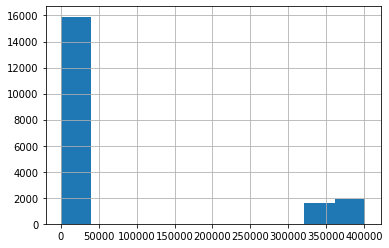

In [21]:
file["days_employed"].hist()
print(len(file[file["days_employed"]>300000])/len(file))

Podemos ver que los valores prolemáticos representan un 16% del total. Eliminarlos sería problemático. Entendemos que estos supuestos días puedan haber sido horas que no han sido convertidas.

3445
3445


<AxesSubplot:>

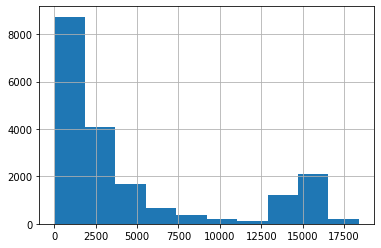

In [22]:
datos_corregir = file[file["days_employed"]>300000]["days_employed"]
datos_corregir = datos_corregir /24
datos_corregir = datos_corregir.round()
print(len(file[file["days_employed"]>300000]))
print(len(datos_corregir))
file.loc[file["days_employed"]>300000,"days_employed"] = datos_corregir
file["days_employed"].hist()

Podemos ver que los días han sido ordenados y los valores negativos arreglados. Hemos podido ver que los valores altos han sido pasados de horas trabajadas a dias trabajados. De esta forma se puede lograr un valor medio. Los datos N.A. serán arreglados más adelante.

In [23]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
file["dob_years"]

0        42
1        36
2        33
3        32
4        53
         ..
21520    43
21521    67
21522    38
21523    38
21524    40
Name: dob_years, Length: 21525, dtype: int64

Hay personas con 0 años de edad. Esto es un claro problema. En este caso no podemos asumir cuál era el valor correcto, por ello, sería lo mejor suprimirlo del estudio. Ademas existen personas con edades negativas, estas suponemos son un error de tipeo.

In [24]:
ceros = file[file["dob_years"]==0]
print(ceros.head(10))

      children  days_employed  dob_years            education  education_id  \
99           0        14439.0          0  secondary education             1   
149          0         2664.0          0  secondary education             1   
270          3         1873.0          0  secondary education             1   
578          0        16577.0          0  secondary education             1   
1040         0         1158.0          0    bachelor's degree             0   
1149         0          935.0          0  secondary education             1   
1175         0        15453.0          0  secondary education             1   
1386         0         5043.0          0    bachelor's degree             0   
1890         0            NaN          0    bachelor's degree             0   
1898         0        15423.0          0  secondary education             1   

        family_status  family_status_id gender    income_type  debt  \
99            married                 0      F        retir

Sería importante indagar porqué sucedió este error. Vemos que los perfiles son diversos con respecto a los datos. Por ello podemos suponer que el digitador escribió, por ejemplo, 0 en vez de 40 en un rango de edades múltiple. Vemos cuántos errores hay así.

In [25]:
# Resuelve los problemas en la columna `dob_years`, si existen
error_porcent = len(file[file["dob_years"]==0]) / len(file["dob_years"])
print(f' El porcentaje de personas con 0 años es de {error_porcent*100} %. Irrelevante en el total')
print()
file = file[file["dob_years"]!=0]

 El porcentaje de personas con 0 años es de 0.4692218350754936 %. Irrelevante en el total



Vemos que el porcentaje es apenas del 0.47% aproximadamente de la muestra. Se podría asignarle un valor a esta edad a través de una mediana, mas no lo haremos pues es estadísticamente es irrelevante.

In [26]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(file.head())
file.info()

   children  days_employed  dob_years            education  education_id  \
0         1         8438.0         42    bachelor's degree             0   
1         1         4025.0         36  secondary education             1   
2         0         5623.0         33  secondary education             1   
3         3         4125.0         32  secondary education             1   
4         0        14178.0         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  
0    purchase of the house 

In [27]:
# Veamos los valores de la columna
print(file["family_status"].value_counts())

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64


Parece no haber problemas en los valores presentados.

In [28]:
# Veamos los valores en la columna
print(file["gender"].value_counts())

F      14164
M       7259
XNA        1
Name: gender, dtype: int64


Aborda los valores problemáticos, si existen.
XNA puede ser una entrada para hacer referencia a otro género. No será suprimido.

In [29]:
# Veamos los valores en la columna
print(file["income_type"].value_counts())

employee                       11064
business                        5065
retiree                         3836
civil servant                   1453
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


No hay problemas.

In [30]:
# Comprobar los duplicados
print(file[file.duplicated()==True])

       children  days_employed  dob_years            education  education_id  \
2849          0            NaN         41  secondary education             1   
3290          0            NaN         58  secondary education             1   
4182          1            NaN         34    bachelor's degree             0   
4851          0            NaN         60  secondary education             1   
5557          0            NaN         58  secondary education             1   
...         ...            ...        ...                  ...           ...   
20702         0            NaN         64  secondary education             1   
21032         0            NaN         60  secondary education             1   
21132         0            NaN         47  secondary education             1   
21281         1            NaN         30    bachelor's degree             0   
21415         0            NaN         54  secondary education             1   

           family_status  family_status

Aborda los duplicados, si existen:
Vemos que existen duplicados en cuanto a diferentes variables, pero esto no tiene porqué alarmarnos. Muchos de los usuarios pueden presentar las mismas características. Si un identificador único estuviese repetido, entonces habría porqué preocuparse.

# Trabajar con valores ausentes

In [31]:
education_id_info = {
    '0': "bachelor's degree",
    '1': "secondary education",
    '2': "some college",
    '3': "primary education",
    '4': "graduate degree" 
}

family_status_info = {
    '0': "married",
    '1': "civil partnership",
    '2': "widow / widower",
    '3': "divorced",
    '4': "unmarried" 
}

Se puede utilizar los diccionarios para poder entender mejor la data. Por ejemplo, 
education_id - identificador de educación
family_status_id - identifica el status de la familia. En este caso, no es tan necesario pues el label del código ya se encuentra en nuestras columnas.
    

### Restaurar valores ausentes en `total_income`

   children  days_employed  dob_years            education  education_id  \
0         1         8438.0         42    bachelor's degree             0   
1         1         4025.0         36  secondary education             1   
2         0         5623.0         33  secondary education             1   
3         3         4125.0         32  secondary education             1   
4         0        14178.0         53  secondary education             1   
5         0          926.0         27    bachelor's degree             0   
6         0         2879.0         43    bachelor's degree             0   
7         0          153.0         50  secondary education             1   
8         2         6930.0         35    bachelor's degree             0   
9         0         2189.0         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1

<AxesSubplot:>

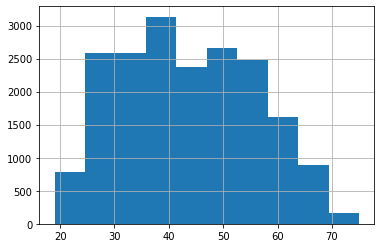

In [32]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien
val_no_aus = file[file["total_income"].isna()==False]
print(val_no_aus.head(10))
val_no_aus["dob_years"].hist()

In [33]:
#Categorizando los valores de dob_years
def grupo_edad(status): 
    if status <= 30:
        return 'Adulto joven'
    elif status <= 50:
        return 'Adulto'
    else:
        return 'Adulto mayor'
        
file["grupo_edad"] = file["dob_years"].apply(grupo_edad)
print(file["grupo_edad"].value_counts())

Adulto          11019
Adulto mayor     6682
Adulto joven     3723
Name: grupo_edad, dtype: int64


In [34]:
# Examina los valores medios de los ingresos en función de los factores que identificaste
for x in file["grupo_edad"].unique():
    sample_mean = file[file["grupo_edad"]==x]["total_income"].mean().round()
    print(f'La media de ingresos de {x} es : {sample_mean}')

La media de ingresos de Adulto es : 28383.0
La media de ingresos de Adulto mayor es : 24704.0
La media de ingresos de Adulto joven es : 25818.0


In [35]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste
for x in file["grupo_edad"].unique():
    sample_median = file[file["grupo_edad"]==x]["total_income"].median().round()
    print(f'La mediana de ingresos de {x} es : {sample_median}')

La mediana de ingresos de Adulto es : 24712.0
La mediana de ingresos de Adulto mayor es : 21311.0
La mediana de ingresos de Adulto joven es : 22957.0


Adulto
Adulto mayor
Adulto joven


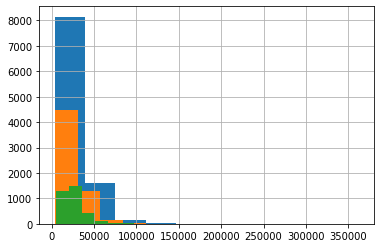

In [36]:
for x in file["grupo_edad"].unique():
    print(x)
    variable = file[file["grupo_edad"]==x]["total_income"]
    variable.hist()

Vemos que en los subgrupos la distribución es asimétrica hacia la derecha. Por lo tanto la mediana sería una mejor aproximacion a ello.

In [37]:
med_vars = file.groupby('grupo_edad')['total_income'].transform('median')
file['total_income'].fillna(med_vars, inplace=True)

In [38]:
# Comprueba si funciona
print(file["total_income"].value_counts(dropna=False))

24711.8435    1095
21310.9445     712
22957.1850     357
31791.3840       2
17312.7170       2
              ... 
29224.4030       1
40299.3820       1
10000.3920       1
99284.6960       1
41428.9160       1
Name: total_income, Length: 19260, dtype: int64


In [39]:
# Comprueba si tenemos algún error
print(file[file["total_income"].isna()==True].sum()["total_income"])

0.0


Los valores han sido completados correctamente con la mediana.


In [40]:
# Comprobar el número de entradas en las columnas
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21424 non-null  int64  
 1   days_employed     19260 non-null  float64
 2   dob_years         21424 non-null  int64  
 3   education         21424 non-null  object 
 4   education_id      21424 non-null  int64  
 5   family_status     21424 non-null  object 
 6   family_status_id  21424 non-null  int64  
 7   gender            21424 non-null  object 
 8   income_type       21424 non-null  object 
 9   debt              21424 non-null  int64  
 10  total_income      21424 non-null  float64
 11  purpose           21424 non-null  object 
 12  grupo_edad        21424 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


###  Restaurar valores en `days_employed`

In [41]:
#Categorizando los valores de dob_years
def grupo_dias(status): 
    if status < 365:
        return 'Menos de 1 año'
    elif status < 365*3:
        return 'Entre 1 y 3 años'
    elif status < 365*5:
        return 'Entre 3 y 5 años'
    elif status < 365*10:
        return 'Entre 5 y 10 años'
    elif status < 365*25:
        return 'Entre 10 y 25 años'
    else:
        return "Más de 25 años"
        
file["days_employed_cat"] = file["days_employed"].apply(grupo_dias)
print(file["days_employed_cat"].value_counts())

Más de 25 años        5970
Entre 5 y 10 años     4106
Entre 1 y 3 años      3883
Entre 3 y 5 años      2891
Entre 10 y 25 años    2758
Menos de 1 año        1816
Name: days_employed_cat, dtype: int64


In [42]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados
for x in file["days_employed_cat"].unique():
    sample_mean = file[file["days_employed_cat"]==x]["days_employed"].mean().round()
    print(f'La media de ingresos de personas que trabajaron {x} es : {sample_mean}')

La media de ingresos de personas que trabajaron Entre 10 y 25 años es : 5394.0
La media de ingresos de personas que trabajaron Más de 25 años es : 14806.0
La media de ingresos de personas que trabajaron Entre 1 y 3 años es : 722.0
La media de ingresos de personas que trabajaron Entre 5 y 10 años es : 2632.0
La media de ingresos de personas que trabajaron Menos de 1 año es : 221.0
La media de ingresos de personas que trabajaron Entre 3 y 5 años es : 1439.0


In [43]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
for x in file["days_employed_cat"].unique():
    sample_median = file[file["days_employed_cat"]==x]["days_employed"].median()
    print(f'La mediana de ingresos de personas que trabajaron {x} es : {round(sample_median,0)}')

La mediana de ingresos de personas que trabajaron Entre 10 y 25 años es : 5009.0
La mediana de ingresos de personas que trabajaron Más de 25 años es : 15049.0
La mediana de ingresos de personas que trabajaron Entre 1 y 3 años es : 717.0
La mediana de ingresos de personas que trabajaron Entre 5 y 10 años es : 2580.0
La mediana de ingresos de personas que trabajaron Menos de 1 año es : 220.0
La mediana de ingresos de personas que trabajaron Entre 3 y 5 años es : 1430.0


Entre 10 y 25 años
Más de 25 años
Entre 1 y 3 años
Entre 5 y 10 años
Menos de 1 año
Entre 3 y 5 años


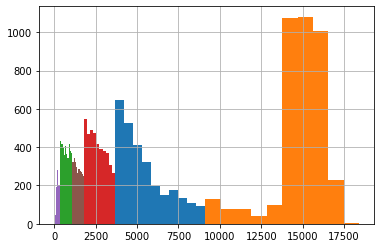

In [44]:
for x in file["days_employed_cat"].unique():
    print(x)
    variable = file[file["days_employed_cat"]==x]["days_employed"]
    variable.hist()

La distrubición de datos muestra datos extremos y distribuciones no normales, existen datos atípicos que distorsionan a la media. Decidimos usar la mediana.

In [45]:
med_vars = file.groupby('grupo_edad')['days_employed'].transform('median')
file['days_employed'].fillna(med_vars, inplace=True)

In [46]:
# Comprueba si la función funcionó
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           21424 non-null  int64  
 1   days_employed      21424 non-null  float64
 2   dob_years          21424 non-null  int64  
 3   education          21424 non-null  object 
 4   education_id       21424 non-null  int64  
 5   family_status      21424 non-null  object 
 6   family_status_id   21424 non-null  int64  
 7   gender             21424 non-null  object 
 8   income_type        21424 non-null  object 
 9   debt               21424 non-null  int64  
 10  total_income       21424 non-null  float64
 11  purpose            21424 non-null  object 
 12  grupo_edad         21424 non-null  object 
 13  days_employed_cat  21424 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.5+ MB


## Clasificación de datos <a id='data_class'></a>

In [47]:
# Muestra los valores de los datos seleccionados para la clasificación
print(file["family_status"].value_counts())

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64


In [48]:
# Comprobar los valores únicos
print(file["family_status"].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


In [49]:
# Escribamos una función para clasificar los datos en función de temas comunes
def caracteristicas(file):
    children = file["children"]
    status = file["family_status"]
    
    if children == 0:
        if status == "unmarried" or status == "divorced" or  status == "widow/widower":
            return "sin hijos, soltero"
        else:
            return "sin hijos, con pareja"
    else:
        if status == "unmarried" or status == "divorced" or  status == "widow/widower":
            return "con hijos, soltero"
        else:
            return "con hijos, con pareja"
        
file["categ_fam"] = file.apply(caracteristicas,axis=1)
print(file["categ_fam"].value_counts())

sin hijos, con pareja    11051
con hijos, con pareja     6391
sin hijos, soltero        3029
con hijos, soltero         953
Name: categ_fam, dtype: int64


In [50]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación
print(file["total_income"].value_counts().sort_index())

3306.762      1
3392.845      1
3418.824      1
3471.216      1
3503.298      1
             ..
273809.483    1
274402.943    1
276204.162    1
352136.354    1
362496.645    1
Name: total_income, Length: 19260, dtype: int64


24711.8435    1095
21310.9445     712
22957.1850     357
31791.3840       2
17312.7170       2
              ... 
29224.4030       1
40299.3820       1
10000.3920       1
99284.6960       1
41428.9160       1
Name: total_income, Length: 19260, dtype: int64



<function matplotlib.pyplot.show(close=None, block=None)>

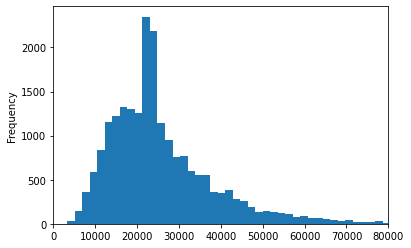

In [51]:
# Obtener estadísticas resumidas para la columna

import matplotlib.pyplot as plt 



print(file["total_income"].value_counts())
graph = file["total_income"].plot(kind="hist",bins=200)
print()
plt.xlim(0, 80000)
plt.show

In [52]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos
def rangos_ec(status):
    if status <= 5000:
        return 'Ingresos muy bajos'
    if status <= 10000:
        return 'Ingresos bajos'
    if status <= 25000:
        return 'Ingresos medios'
    if status <= 50000:
        return 'Ingresos altos'
    return 'Ingresos muy altos'

In [53]:
# Crear una columna con categorías
file["cat_ingresos"] = file["total_income"].apply(rangos_ec)

In [54]:
# Contar los valores de cada categoría para ver la distribución
file["cat_ingresos"].value_counts()

Ingresos medios       11943
Ingresos altos         7242
Ingresos muy altos     1318
Ingresos bajos          895
Ingresos muy bajos       26
Name: cat_ingresos, dtype: int64

Categorización según los diferentes propósitos del préstamo

In [55]:
def purpose_sum(status):
    if "build" in status:
        return "build"
    if "real state" in status or "house" in status:
        return 'real state'
    if "car" in status:
        return 'car'
    if "education" in status:
        return "education"
    if "wedding" in status:
        return "wedding"
    return "others"
file["purpose_sum"] = file["purpose"].apply(purpose_sum)

## Comprobación de las hipótesis <a id='data_comp'></a>


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [56]:
# Comprueba los datos sobre los hijos y los pagos puntuales
file.pivot_table(index="categ_fam",values="debt",aggfunc="mean")

,debt
categ_fam,
"con hijos, con pareja",0.091066
"con hijos, soltero",0.097587
"sin hijos, con pareja",0.071758
"sin hijos, soltero",0.087488


**Conclusión**
Lo que indica las medias es que mientras más hijos se tiene más probabilidad de tener deuda hubo en la data histórica.

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [57]:
# Comprueba los datos del estado familiar y los pagos a tiempo
file.pivot_table(index="categ_fam",values="debt",aggfunc="mean")

,debt
categ_fam,
"con hijos, con pareja",0.091066
"con hijos, soltero",0.097587
"sin hijos, con pareja",0.071758
"sin hijos, soltero",0.087488


**Conclusión**
Efectivamente, las personas con hijos tienen son más propensos a tener retrasos en deudas a comparación a aquellos sin hijos, aunque la diferencia no es tan grande pues apenas es del 2% entre los grupos.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [58]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
file.pivot_table(index="cat_ingresos",values="debt",aggfunc="mean")


,debt
cat_ingresos,
Ingresos altos,0.080088
Ingresos bajos,0.062570
Ingresos medios,0.083982
Ingresos muy altos,0.069803
Ingresos muy bajos,0.076923


**Conclusión**

Según la clasificación y la data, los ingresos no determinan cierta correlación. De hecho los valores más altos serían de aquellas personas con ingresos medios y altos. Debería analizarse más a fondo si esta conclusión es acertada o se debe a diferentes causas en cada subgrupo. En general, no se puede indicar que el nivel de ingresos determina un nivel de deuda en nuestra información.

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [59]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
print(file.pivot_table(index="purpose",values="debt",aggfunc="mean"))
print()
file.pivot_table(index="purpose_sum",values="debt",aggfunc="mean")

                                              debt
purpose                                           
building a property                       0.087097
building a real estate                    0.077047
buy commercial real estate                0.071104
buy real estate                           0.069243
buy residential real estate               0.067881
buying a second-hand car                  0.075157
buying my own car                         0.091633
buying property for renting out           0.079877
car                                       0.085540
car purchase                              0.091304
cars                                      0.092437
construction of own property              0.066351
education                                 0.072072
getting an education                      0.083710
getting higher education                  0.108491
going to university                       0.087221
having a wedding                          0.082794
housing                        

,debt
purpose_sum,
build,0.082060
car,0.093175
education,0.092903
others,0.074000
real state,0.066316
wedding,0.078835


**Conclusión**
Las principal clasificación indica que las personas que se endeudan para la compra de un auto son más propensos a incurrir en deuda, seguidos por aquellas personas que se endeudan por motivos de educación.



# Conclusión general <a id="conclu_general"><a/>
Con respecto a las clasificaciones hemos podido encontrar los siguiente:
1. Lo que indica las medias es que mientras más hijos se tiene más probabilidad de tener deuda hubo en la data histórica.
2. Según la clasificación y la data, los ingresos no determinan cierta correlación. De hecho los valores más altos serían de aquellas personas con ingresos medios y altos.
3. Las principal clasificación indica que las personas que se endeudan para la compra de un auto son más propensos a incurrir en deuda, seguidos por aquellas personas que se endeudan por motivos de educación.

Finalmente, la base de datos está lista para el análisis y darle una puntuación según las características dadas.

